In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot
import functions_profiles

from salishsea_tools import nc_tools, viz_tools
from salishsea_tools import gsw_calls

In [2]:
bathyR_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/realistic/real_bathy_02.nc')
bathyR = bathyR_file['Bathymetry']

bathyI_file = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_05.nc')
bathyI = bathyI_file['Bathymetry']

coord_lats = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_02.nc')['nav_lat'][:]

pathI = '/ocean/imachuca/Canyons/results_mackenzie/idealized/Resolution_237_177/'

cfg = 'Run04'
gridI4, lonI4, latI4, temI4, salI4, sshI4, UI4, VI4, WI4, tmaskI4 = functions_plot.load_model_output(pathI, cfg)
utau4, vtau4 = functions_plot.load_model_other(pathI, cfg)
depth_levelsI4 = gridI4['deptht'][:]

cfg = 'Run05'
gridI5, lonI5, latI5, temI5, salI5, sshI5, UI5, VI5, WI5, tmaskI5 = functions_plot.load_model_output(pathI, cfg)
utau5, vtau5 = functions_plot.load_model_other(pathI, cfg)
depth_levelsI5 = gridI5['deptht'][:]

cfg = 'Run06'
gridI6, lonI6, latI6, temI6, salI6, sshI6, UI6, VI6, WI6, tmaskI6 = functions_plot.load_model_output(pathI, cfg)
utau6, vtau6 = functions_plot.load_model_other(pathI, cfg)
depth_levelsI6 = gridI6['deptht'][:]

cfg = 'Run07'
gridI7, lonI7, latI7, temI7, salI7, sshI7, UI7, VI7, WI7, tmaskI7 = functions_plot.load_model_output(pathI, cfg)
utau7, vtau7 = functions_plot.load_model_other(pathI, cfg)
depth_levelsI7 = gridI7['deptht'][:]

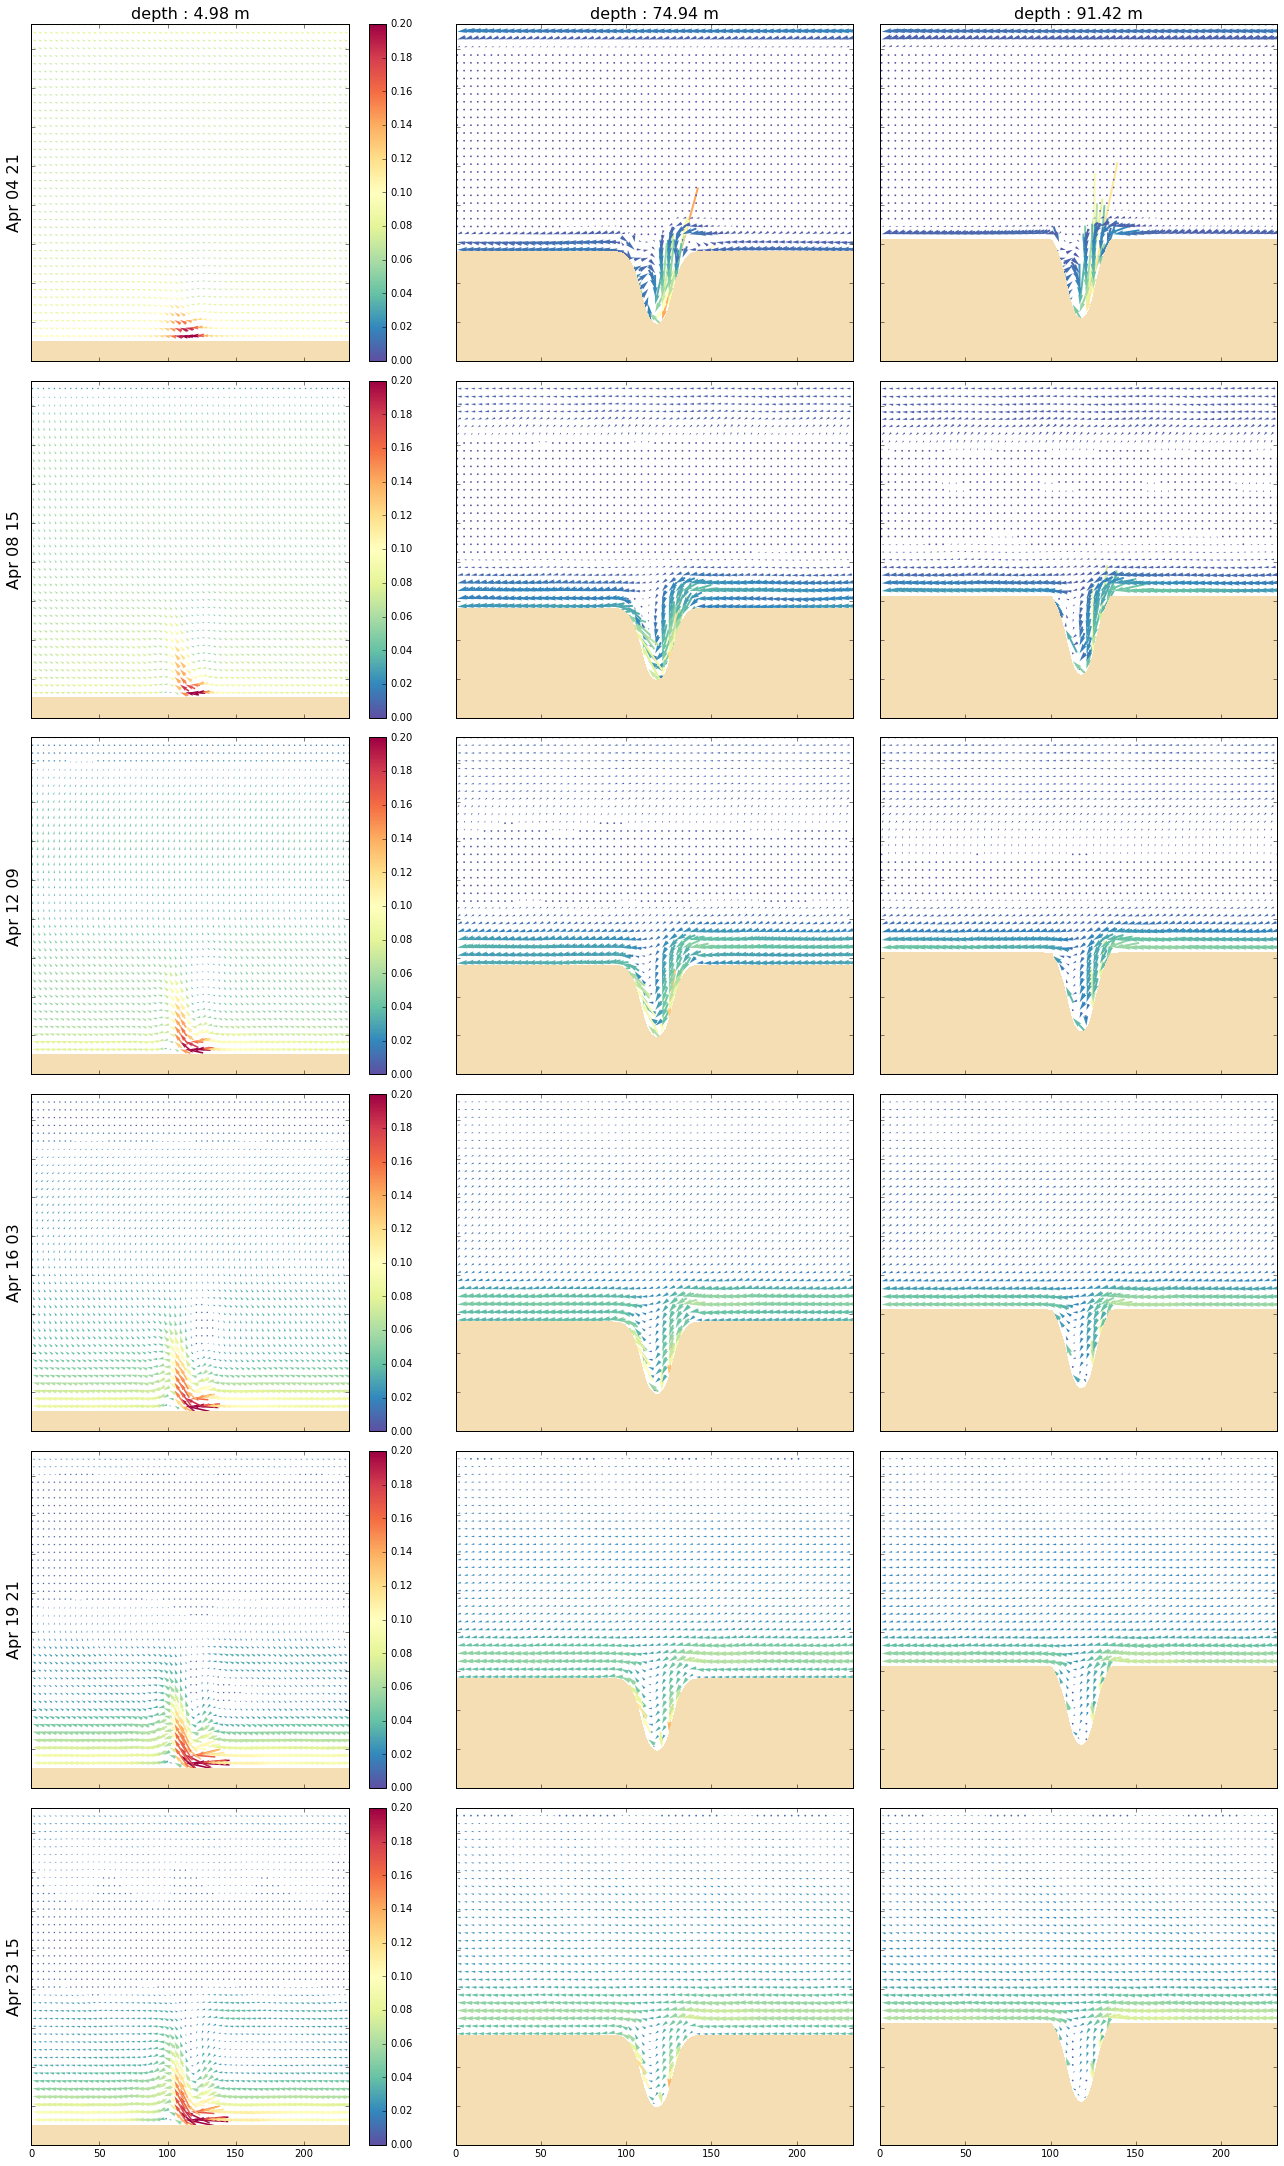

In [4]:
depth_inds = [0, 6, 7]
time_inds = np.arange(3,80,15)
fig = functions_profiles.plot_quiver_stories(UI7, VI7, gridI7, depth_inds, time_inds, 0.2, 4, bathyI_file)

In [4]:
def plot_incoming_speeds(U_vel, V_vel, gridT, depth_ind, time_inds, max_vel, arrow, bathy_file, nn_tau000_write, utau):
    
    x_point = 160; y_min = 55; y_max = 75
    dep_m = round(gridT['deptht'][:][depth_ind],2)
    matplotlib.rcParams.update({'font.size': 14})

    fig = plt.figure(figsize=(20,9))
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,1,2)
    fig.tight_layout()

    x_slice, y_slice, u_nstg, v_nstg, speeds = functions_profiles.get_speeds(U_vel, V_vel, depth_ind, nn_tau000_write, arrow)
    p = ax1.pcolor(speeds, vmin=0, vmax=max_vel, cmap='Spectral_r')
    viz_tools.plot_land_mask(ax1, bathy_file,'grid', dep_m, None, None, 'wheat')
    timestamp = nc_tools.timestamp(gridT,nn_tau000_write).format('MM/DD')
    ax1.set_title('Flow speed at nn_tau000 = '+str(nn_tau000_write)+' ('+timestamp+')')
    fig.colorbar(p, ax=ax1)

    y_line = np.linspace(y_min, y_max, 5)
    x_line = np.ones_like(y_line)*x_point
    ax1.plot(x_line, y_line, linewidth=3, c='k', label='transect', marker='o')
    ax1.legend(loc=4)
    ax1.grid()
    ax1.set_ylim([15, 90])

    ax2.plot(np.arange(len(utau)), utau[:,-1,-1], marker='o', c='k', lw=3)
    ax2.axvline(nn_tau000_write, c = 'dodgerblue', lw=3, label='nn_tau000 = '+str(nn_tau000_write))
    ax2.legend(loc=4); ax2.grid()
    ax2.set_title('Wind stress forcing')

    U_vel = U_vel[:, :, y_min:y_max, x_point-1:x_point+1]
    V_vel = V_vel[:, :, y_min:y_max, x_point-1:x_point+1]
    cm_times = np.linspace(0, 1, len(time_inds))
    colors = [ cm.Dark2(x) for x in cm_times]

    for time_ind, c in zip(time_inds, colors):
        x_slice, y_slice, u_nstg, v_nstg, speeds = functions_profiles.get_speeds(U_vel, V_vel, depth_ind, time_ind, arrow)
        timestamp = nc_tools.timestamp(gridT,time_ind).format('MM/DD')
        xs = np.arange(len(speeds)) + y_min
        ax3.plot(xs,speeds[:, 0], label=str(int(time_ind))+': '+timestamp, color=c,lw=4)
    ax3.legend(ncol=2, loc=4)
    ax3.set_xlabel('Y points along transect')
    ax3.set_ylabel('Speed [m/s]')
    ax3.set_title('Flow speeds at different times')
    plt.show()
    return fig

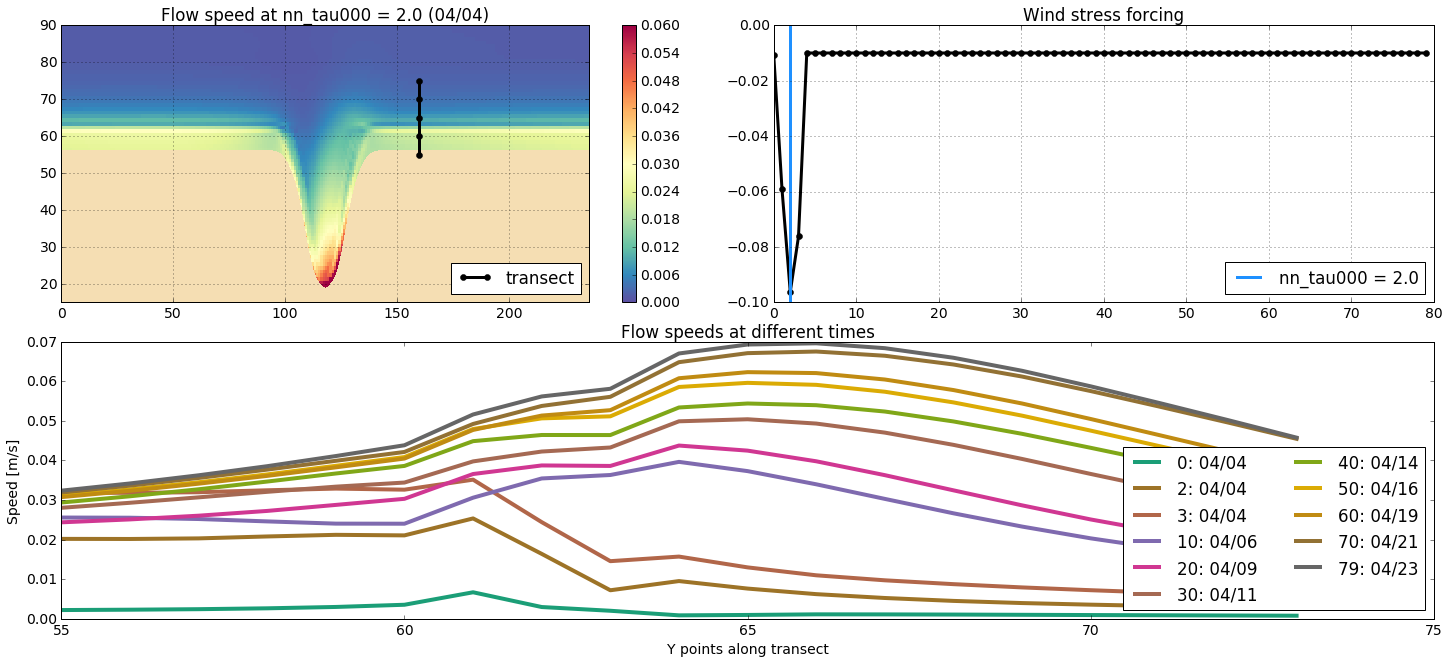

In [5]:
nn_tau000 = 4320; nn_write = 2160; nn_tau000_write = nn_tau000/nn_write
before = np.insert([nn_tau000_write+1], 0, np.linspace(0,nn_tau000_write,2), 0)
ind_end=79; rest = [10,20,30,40,50,60,70,79]
time_inds = np.insert(rest, 0, before, 0)

fig = plot_incoming_speeds(UI6, VI6, gridI6, 6, time_inds, 0.06, 1, bathyI_file, nn_tau000_write, utau6)

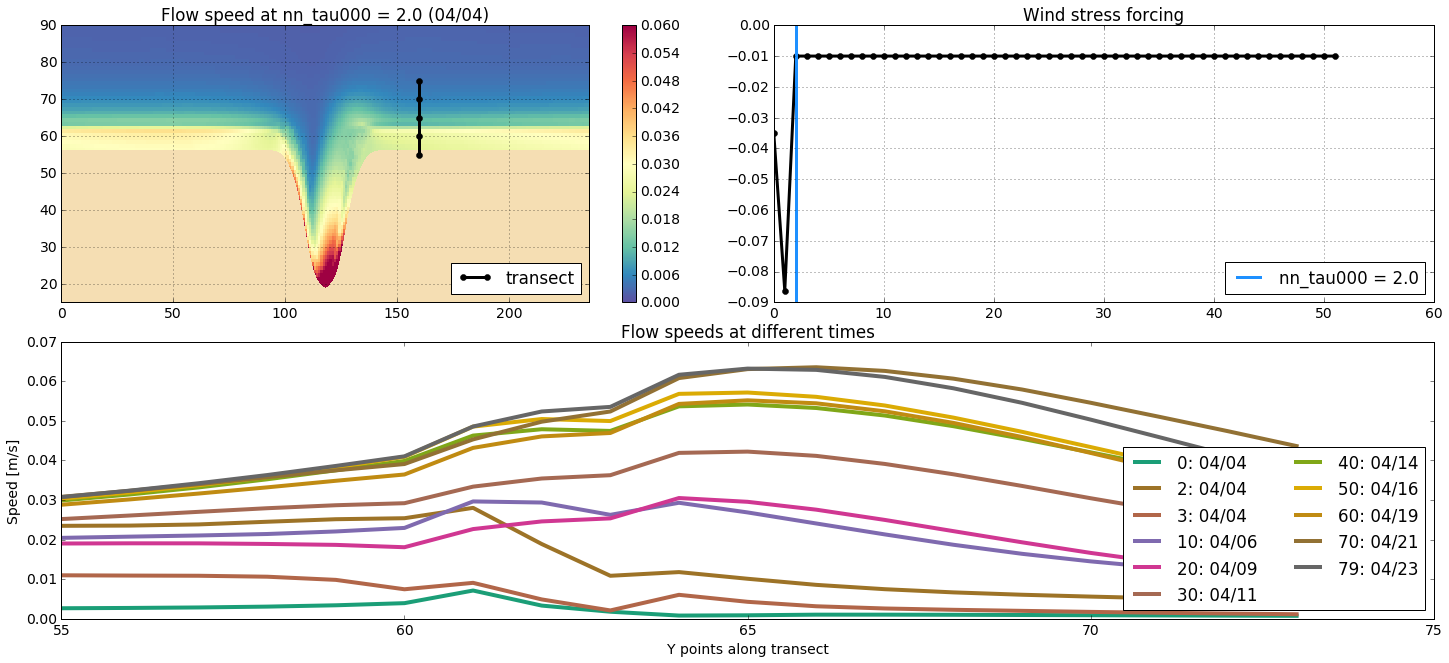

In [10]:
nn_tau000 = 4320; nn_write = 2160; nn_tau000_write = nn_tau000/nn_write
before = np.insert([nn_tau000_write+1], 0, np.linspace(0,nn_tau000_write,2), 0)
ind_end=79; rest = [10,20,30,40,50,60,70,79]
time_inds = np.insert(rest, 0, before, 0)

fig = plot_incoming_speeds(UI7, VI7, gridI7, 6, time_inds, 0.06, 1, bathyI_file, nn_tau000_write, utau7)